In [1]:
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
import XSpect.XSpect_PostProcessing
import XSpect.XSpect_Diagnostics
import matplotlib.pyplot as plt

Text(0, 0.5, 'On-off')

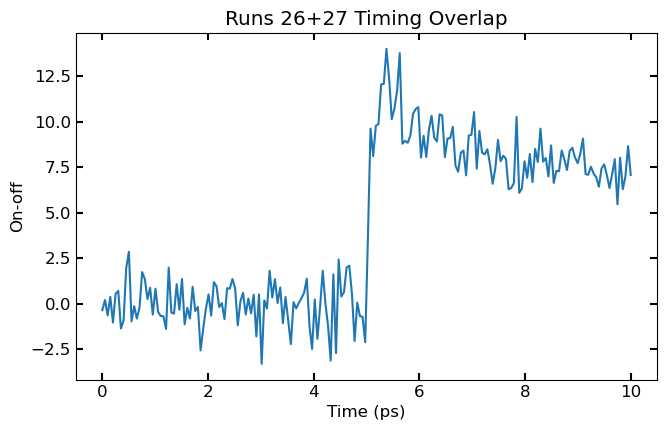

In [2]:

xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.XASBatchAnalysis_1D_time()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm',100.0)
xas.add_filter('simultaneous','ipm',100.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['26-27']) # 7.5 uJ -0.5 to 2 ps
xas.mintime = 0
xas.maxtime = 10
(xas.maxtime-xas.mintime)/0.05
xas.numpoints = int((xas.maxtime-xas.mintime)/0.05)
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
for idx,run in enumerate(xas.analyzed_runs):
    if idx==0:
        on=run.epix_simultaneous_laser_time_binned/run.ipm_simultaneous_laser_time_binned
        off=run.epix_xray_not_laser_time_binned/run.ipm_xray_not_laser_time_binned
    else:
        on=on+run.epix_simultaneous_laser_time_binned/run.ipm_simultaneous_laser_time_binned
        off=off+run.epix_xray_not_laser_time_binned/run.ipm_xray_not_laser_time_binned
#on=xas.analyzed_runs[0].epix_simultaneous_laser_time_binned/xas.analyzed_runs[0].ipm_simultaneous_laser_time_binned
#off=xas.analyzed_runs[0].epix_xray_not_laser_time_binned/xas.analyzed_runs[0].ipm_xray_not_laser_time_binned
diff=on-off
plt.plot(xas.time_bins,on-off)
plt.title('Runs 26+27 Timing Overlap')
plt.xlabel('Time (ps)')
plt.ylabel('On-off')

Obtained shot properties
HDF5 import of keys completed. Time: 0.03 seconds
Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser
Shots (3592) separated for detector epix on filters: xray and laser into epix_xray_laser
Shots combined for detector ipm on filters: simultaneous and laser into ipm_simultaneous_laser
Shots (3592) separated for detector ipm on filters: xray and laser into ipm_xray_laser
Shots combined for detector scan on filters: simultaneous and laser into scan_simultaneous_laser
Shots (3592) separated for detector scan on filters: xray and laser into scan_xray_laser
Shots combined for detector scanvar_indices on filters: simultaneous and laser into scanvar_indices_simultaneous_laser
Shots (3592) separated for detector scanvar_indices on filters: xray and laser into scanvar_indices_xray_laser
Detector epix_simultaneous_laser binned in energy into key: epix_simultaneous_laser_energy_binned
Detector epix_xray_not_laser binned in ener

/lscratch/lbgee/tmp/ipykernel_2900634/3927141757.py:21: RuntimeWarning: invalid value encountered in divide
  plt.plot(f.scanvar_bins,laser_on/norm_on)
/lscratch/lbgee/tmp/ipykernel_2900634/3927141757.py:22: RuntimeWarning: invalid value encountered in divide
  plt.plot(f.scanvar_bins,laser_off/norm_off)


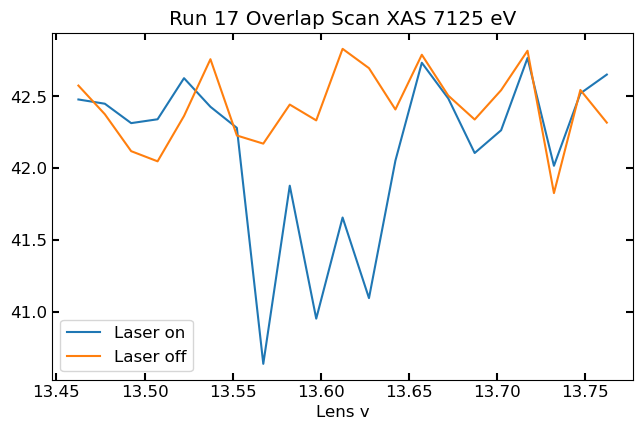

In [3]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
f=XSpect.XSpect_Analysis.spectroscopy_run(xas_experiment,run=17,verbose=True)
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.ScanAnalysis_1D()
analysis=XSpect.XSpect_Analysis.XASAnalysis()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_sum','scan/var0'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix','scan']
xas.set_key_aliases(keys,names)
#xas.
#xas.add_filter('xray','ipm',500.0)
#xas.add_filter('simultaneous','ipm',500.0)
#xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['17']) # 7.5 uJ -0.5 to 2 ps
xas.primary_analysis_loop(xas_experiment)
for f in xas.analyzed_runs:
    laser_on=f.epix_simultaneous_laser_energy_binned
    laser_off=f.epix_xray_not_laser_energy_binned
    norm_on=f.ipm_simultaneous_laser_energy_binned
    norm_off=f.ipm_xray_not_laser_energy_binned

plt.plot(f.scanvar_bins,laser_on/norm_on)
plt.plot(f.scanvar_bins,laser_off/norm_off)
plt.title('Run 17 Overlap Scan XAS 7125 eV')
plt.xlabel('Lens v')
plt.legend(['Laser on','Laser off'])